In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import animate

Loading in the play data

In [2]:
play_data = pd.read_csv('../data/plays.csv')
play_data.describe()

,gameId,playId,quarter,down,yardsToGo,yardlineNumber,preSnapHomeScore,preSnapVisitorScore,absoluteYardlineNumber,preSnapHomeTeamWinProbability,...,timeInTackleBox,timeToSack,qbKneel,penaltyYards,prePenaltyYardsGained,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,pff_runPassOption
count,1.612400e+04,16124.000000,16124.000000,16124.000000,16124.000000,16124.000000,16124.000000,16124.000000,16124.000000,16124.000000,...,8917.000000,608.000000,16124.000000,384.000000,16124.000000,16124.000000,16124.000000,16124.000000,16124.000000,16124.000000
mean,2.022099e+09,2023.830563,2.572253,1.800794,8.461300,29.226185,11.255830,10.049615,60.413483,0.552007,...,2.632755,4.515796,0.010233,1.333333,5.475254,5.460618,-0.000065,0.000065,-0.029381,0.101340
std,5.979252e+03,1182.090771,1.135404,0.827194,3.908658,12.662828,9.468489,9.224680,24.326003,0.290603,...,0.817805,1.314407,0.100643,8.785422,8.622005,8.833095,0.041561,0.041561,1.397405,0.301787
min,2.022091e+09,54.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,11.000000,0.001049,...,0.000000,2.135000,0.000000,-20.000000,-18.000000,-68.000000,-0.834887,-0.541161,-13.023600,0.000000
25%,2.022093e+09,996.000000,2.000000,1.000000,6.000000,21.000000,3.000000,0.000000,40.000000,0.324613,...,2.079000,3.643750,0.000000,0.000000,0.000000,0.000000,-0.012808,-0.013166,-0.645440,0.000000
50%,2.022101e+09,2017.000000,3.000000,2.000000,10.000000,30.000000,10.000000,7.000000,61.000000,0.578922,...,2.569000,4.249000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,-0.178783,0.000000
75%,2.022102e+09,3022.000000,4.000000,2.000000,10.000000,40.000000,17.000000,16.000000,81.000000,0.791601,...,3.100000,5.139000,0.000000,5.000000,8.000000,8.000000,0.013166,0.012808,0.696452,0.000000
max,2.022111e+09,5120.000000,5.000000,4.000000,38.000000,50.000000,49.000000,48.000000,109.000000,0.999197,...,7.400000,11.912000,1.000000,15.000000,98.000000,98.000000,0.541161,0.834887,8.698986,1.000000


Loading in player play data

In [3]:
player_data = pd.read_csv('../data/player_play.csv')
player_data.describe()

,gameId,playId,nflId,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,receivingYards,...,timeToPressureAsPassRusher,getOffTimeAsPassRusher,wasRunningRoute,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
count,3.547270e+05,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,...,4328.000000,48032.000000,42779.0,49104.000000,4373.000000,7.000000,53044.000000,4080.000000,43484.000000,2387.000000
mean,2.022099e+09,2023.833091,47437.201033,0.019136,0.087304,0.017571,0.173268,-0.011471,0.015857,0.173373,...,2.866382,1.013016,1.0,46503.634694,49704.308027,49423.428571,0.076917,2.938971,47937.557078,47982.880184
std,5.979081e+03,1182.056487,5167.218156,0.137003,1.098183,0.131387,1.840473,0.309496,0.124923,1.841174,...,1.029087,0.298124,0.0,5105.945879,4056.385738,3275.463471,0.266463,0.989947,4696.183053,4603.065248
min,2.022091e+09,54.000000,25511.000000,0.000000,-10.000000,0.000000,-10.000000,-18.000000,0.000000,-11.000000,...,0.800000,0.004000,1.0,33131.000000,35454.000000,46269.000000,0.000000,0.800000,29550.000000,30842.000000
25%,2.022093e+09,996.000000,43426.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.200000,0.801000,1.0,43316.000000,46204.000000,47786.500000,0.000000,2.300000,44841.000000,44860.000000
50%,2.022101e+09,2017.000000,46457.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.700000,0.961000,1.0,46141.000000,48198.000000,47944.000000,0.000000,2.700000,47791.000000,46705.000000
75%,2.022102e+09,3022.000000,52590.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.225000,1.171000,1.0,52448.000000,53501.000000,50722.500000,0.000000,3.300000,52608.000000,52644.500000
max,2.022111e+09,5120.000000,55241.000000,1.000000,75.000000,1.000000,98.000000,0.000000,1.000000,98.000000,...,11.600000,2.000000,1.0,55241.000000,55239.000000,54733.000000,1.000000,11.600000,55168.000000,55157.000000


Adding player names and merging with player data

In [4]:
player_names = pd.read_csv('../data/players.csv')
player_data = pd.merge(player_data, player_names[['nflId', 'displayName', 'position']], on='nflId')
player_data.describe()

,gameId,playId,nflId,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,receivingYards,...,timeToPressureAsPassRusher,getOffTimeAsPassRusher,wasRunningRoute,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
count,3.547270e+05,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,...,4328.000000,48032.000000,42779.0,49104.000000,4373.000000,7.000000,53044.000000,4080.000000,43484.000000,2387.000000
mean,2.022099e+09,2023.833091,47437.201033,0.019136,0.087304,0.017571,0.173268,-0.011471,0.015857,0.173373,...,2.866382,1.013016,1.0,46503.634694,49704.308027,49423.428571,0.076917,2.938971,47937.557078,47982.880184
std,5.979081e+03,1182.056487,5167.218156,0.137003,1.098183,0.131387,1.840473,0.309496,0.124923,1.841174,...,1.029087,0.298124,0.0,5105.945879,4056.385738,3275.463471,0.266463,0.989947,4696.183053,4603.065248
min,2.022091e+09,54.000000,25511.000000,0.000000,-10.000000,0.000000,-10.000000,-18.000000,0.000000,-11.000000,...,0.800000,0.004000,1.0,33131.000000,35454.000000,46269.000000,0.000000,0.800000,29550.000000,30842.000000
25%,2.022093e+09,996.000000,43426.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.200000,0.801000,1.0,43316.000000,46204.000000,47786.500000,0.000000,2.300000,44841.000000,44860.000000
50%,2.022101e+09,2017.000000,46457.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.700000,0.961000,1.0,46141.000000,48198.000000,47944.000000,0.000000,2.700000,47791.000000,46705.000000
75%,2.022102e+09,3022.000000,52590.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.225000,1.171000,1.0,52448.000000,53501.000000,50722.500000,0.000000,3.300000,52608.000000,52644.500000
max,2.022111e+09,5120.000000,55241.000000,1.000000,75.000000,1.000000,98.000000,0.000000,1.000000,98.000000,...,11.600000,2.000000,1.0,55241.000000,55239.000000,54733.000000,1.000000,11.600000,55168.000000,55157.000000


Merging to get player data for every play

In [5]:
play_data=pd.merge(play_data, player_data, on='playId')
play_data.describe()

,gameId_x,playId,quarter,down,yardsToGo,yardlineNumber,preSnapHomeScore,preSnapVisitorScore,absoluteYardlineNumber,preSnapHomeTeamWinProbability,...,timeToPressureAsPassRusher,getOffTimeAsPassRusher,wasRunningRoute,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
count,1.776097e+06,1.776097e+06,1.776097e+06,1.776097e+06,1.776097e+06,1.776097e+06,1.776097e+06,1.776097e+06,1.776097e+06,1.776097e+06,...,21307.000000,240452.000000,212302.0,245004.000000,21617.000000,35.000000,264486.000000,19995.000000,216566.000000,11943.000000
mean,2.022099e+09,1.864775e+03,2.446120e+00,1.778292e+00,8.472464e+00,2.908107e+01,1.039756e+01,9.159677e+00,6.062149e+01,5.534164e-01,...,2.850711,1.020165,1.0,46490.382782,49694.983902,49780.628571,0.075599,2.919455,47926.683053,47914.054593
std,5.983690e+03,1.173401e+03,1.133526e+00,8.190818e-01,3.858654e+00,1.247818e+01,9.299398e+00,8.884271e+00,2.434996e+01,2.817302e-01,...,1.006248,0.299152,0.0,5094.438820,4024.581716,3241.349747,0.264357,0.959203,4689.372169,4587.806140
min,2.022091e+09,5.400000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,1.049479e-03,...,0.800000,0.004000,1.0,33131.000000,35454.000000,46269.000000,0.000000,0.800000,29550.000000,30842.000000
25%,2.022093e+09,8.280000e+02,1.000000e+00,1.000000e+00,6.000000e+00,2.100000e+01,3.000000e+00,0.000000e+00,4.000000e+01,3.364433e-01,...,2.200000,0.806000,1.0,43316.000000,46204.000000,47786.000000,0.000000,2.300000,44841.000000,44856.000000
50%,2.022101e+09,1.816000e+03,2.000000e+00,2.000000e+00,1.000000e+01,2.900000e+01,9.000000e+00,7.000000e+00,6.100000e+01,5.779095e-01,...,2.700000,0.969000,1.0,46139.000000,48198.000000,47956.000000,0.000000,2.700000,47791.000000,46461.000000
75%,2.022102e+09,2.875000e+03,3.000000e+00,2.000000e+00,1.000000e+01,3.900000e+01,1.700000e+01,1.400000e+01,8.200000e+01,7.788630e-01,...,3.200000,1.180000,1.0,52446.000000,53498.000000,53489.000000,0.000000,3.300000,52598.000000,52630.000000
max,2.022111e+09,5.120000e+03,5.000000e+00,4.000000e+00,3.800000e+01,5.000000e+01,4.900000e+01,4.800000e+01,1.090000e+02,9.991967e-01,...,11.600000,2.000000,1.0,55241.000000,55239.000000,54733.000000,1.000000,11.600000,55168.000000,55157.000000


## Initial Idea

- For every play, store information for every defensive player (movement, speed, etc.)
- Create features from each play (need to figure out specific values)
    - Separate into presnap features and post snap features
- Create blitz labels
    - For postsnap features, cluster into 2 groups based on player movement, qb sacked, pressure, etc.
- Train SVM on subset of presnap features and labels
- Use to predict blitz and gain additional blitz insight?
    - analyze formations, initial position, motion of defense presnap

## Add Blitz Column to Play Data

In [6]:
player_data = pd.read_csv('../data/player_play.csv')
play_data = pd.read_csv('../data/plays.csv')

In [7]:
player_data['hadRushAttempt'].unique()

array([0, 1])

In [8]:
play_data['blitz'] = np.where(
    player_data.groupby('playId')['hadRushAttempt'].sum().reindex(play_data['playId']).fillna(0) >= 5, 
    1, 0)

play_data[play_data.blitz == 1]['playDescription']

59       (7:21) J.Mixon left end to MIA 45 for 4 yards ...
62       (9:05) (Shotgun) J.Allen scrambles left end ra...
91       (11:23) Prior to the play, an official timeout...
95       (5:24) D.Jones scrambles left end for 8 yards,...
96       (14:21) (Shotgun) R.Wilson pass incomplete sho...
                               ...                        
16016    (5:01) (Shotgun) P.Mahomes scrambles right tac...
16017    (15:00) L.Fournette up the middle to TB 26 for...
16040    (15:00) (Shotgun) D.Pierce up the middle to HS...
16053    (7:51) (Shotgun) L.Jackson pass short right to...
16074    (14:21) (Shotgun) D.Carr sacked at LV 24 for -...
Name: playDescription, Length: 964, dtype: object

Exporting blitz data

In [22]:
play_data.to_csv('../data/blitz_plays.csv', index=False)

## Grouping Players by Individual Plays

### Isolating Defensive Players

First, we need to drop all offensive metrics from player_data

In [9]:
player_data.columns

Index(['gameId', 'playId', 'nflId', 'teamAbbr', 'hadRushAttempt',
       'rushingYards', 'hadDropback', 'passingYards', 'sackYardsAsOffense',
       'hadPassReception', 'receivingYards', 'wasTargettedReceiver',
       'yardageGainedAfterTheCatch', 'fumbles', 'fumbleLost',
       'fumbleOutOfBounds', 'assistedTackle', 'forcedFumbleAsDefense',
       'halfSackYardsAsDefense', 'passDefensed', 'quarterbackHit',
       'sackYardsAsDefense', 'safetyAsDefense', 'soloTackle', 'tackleAssist',
       'tackleForALoss', 'tackleForALossYardage', 'hadInterception',
       'interceptionYards', 'fumbleRecoveries', 'fumbleRecoveryYards',
       'penaltyYards', 'penaltyNames', 'wasInitialPassRusher',
       'causedPressure', 'timeToPressureAsPassRusher',
       'getOffTimeAsPassRusher', 'inMotionAtBallSnap', 'shiftSinceLineset',
       'motionSinceLineset', 'wasRunningRoute', 'routeRan',
       'blockedPlayerNFLId1', 'blockedPlayerNFLId2', 'blockedPlayerNFLId3',
       'pressureAllowedAsBlocker', 'timeT

In [10]:
player_data_defensive = player_data.drop(
    columns=[
        'rushingYards',
        'hadDropback',
        'passingYards',
        'sackYardsAsOffense',
        'yardageGainedAfterTheCatch',
        'wasTargettedReceiver',
        'wasRunningRoute',
        'routeRan'
        ], 
    axis=1)

player_data_defensive.head()

,gameId,playId,nflId,teamAbbr,hadRushAttempt,hadPassReception,receivingYards,fumbles,fumbleLost,fumbleOutOfBounds,...,shiftSinceLineset,motionSinceLineset,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
0,2022090800,56,35472,BUF,0,0,0,0,0,0,...,False,False,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2022090800,56,42392,BUF,0,0,0,0,0,0,...,False,False,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2022090800,56,42489,BUF,0,1,6,0,0,0,...,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022090800,56,44875,BUF,0,0,0,0,0,0,...,False,False,43335.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2022090800,56,44985,BUF,0,0,0,0,0,0,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Need to join with player name data and filter by position to isolate defense

In [11]:
player_data_defensive=pd.merge(player_data_defensive, player_names[['nflId', 'position']], on='nflId')
player_data_defensive=player_data_defensive[player_data_defensive['position'].isin(['DT', 'LB', 'ILB', 'MLB', 'OLB', 'CB', 'SS', 'FS', 'DE', 'NT', 'DB'])].copy()

Check that there are 11 players per play

In [12]:
player_data_defensive.groupby(['gameId','playId']).size()

gameId      playId
2022090800  56        11
            80        11
            101       11
            122       11
            167       11
                      ..
2022110700  3658      11
            3686      11
            3707      11
            3740      11
            3787      11
Length: 16124, dtype: int64

### Grouping by Specific Plays

In [13]:
play_data.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY',
       'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType',
       'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak',
       'rushLocationType', 'penaltyYards', 'prePenaltyYardsGained',
       'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runConceptPrimary', 'pff_runConceptSecondary', 'pff_runPassOption',
       'pff_pass

# Examining Player Tracking

Loading in week 1 and messing around

In [14]:
player_tracking_data = pd.read_csv('../data/tracking_week_1.csv')
player_tracking_data.head()

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091200,64,35459.0,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,22.0,DEN,right,51.06,28.55,0.72,0.37,0.07,246.17,68.34,huddle_break_offense
1,2022091200,64,35459.0,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,22.0,DEN,right,51.13,28.57,0.71,0.36,0.07,245.41,71.21,NaN
2,2022091200,64,35459.0,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,22.0,DEN,right,51.20,28.59,0.69,0.23,0.07,244.45,69.90,NaN
3,2022091200,64,35459.0,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,22.0,DEN,right,51.26,28.62,0.67,0.22,0.07,244.45,67.98,NaN
4,2022091200,64,35459.0,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,22.0,DEN,right,51.32,28.65,0.65,0.34,0.07,245.74,62.83,NaN


In [15]:
player_tracking_data['frameType'].unique()

array(['BEFORE_SNAP', 'SNAP', 'AFTER_SNAP'], dtype=object)

Load in every week and concat into one massive df

In [16]:
for i in range(2,10):
    week = pd.read_csv(f'../data/tracking_week_{i}.csv')
    player_tracking_data = pd.concat([player_tracking_data, week])

Filter according to player defense df

In [17]:
defensive_tracking_data = pd.merge(
    player_tracking_data, 
    player_data_defensive[['gameId', 'playId', 'nflId']], 
    on=['gameId', 'playId', 'nflId'], how='inner')

defensive_tracking_data.head()

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091200,64,35459.0,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,22.0,DEN,right,51.06,28.55,0.72,0.37,0.07,246.17,68.34,huddle_break_offense
1,2022091200,64,35459.0,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,22.0,DEN,right,51.13,28.57,0.71,0.36,0.07,245.41,71.21,NaN
2,2022091200,64,35459.0,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,22.0,DEN,right,51.20,28.59,0.69,0.23,0.07,244.45,69.90,NaN
3,2022091200,64,35459.0,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,22.0,DEN,right,51.26,28.62,0.67,0.22,0.07,244.45,67.98,NaN
4,2022091200,64,35459.0,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,22.0,DEN,right,51.32,28.65,0.65,0.34,0.07,245.74,62.83,NaN


Drop unneeded columns

In [18]:
defensive_tracking_data.drop(
    columns=['displayName', 'jerseyNumber', 'club', 'time', 'event'], axis=1,
    inplace=True
    )

In [19]:
defensive_tracking_data.head()

,gameId,playId,nflId,frameId,frameType,playDirection,x,y,s,a,dis,o,dir
0,2022091200,64,35459.0,1,BEFORE_SNAP,right,51.06,28.55,0.72,0.37,0.07,246.17,68.34
1,2022091200,64,35459.0,2,BEFORE_SNAP,right,51.13,28.57,0.71,0.36,0.07,245.41,71.21
2,2022091200,64,35459.0,3,BEFORE_SNAP,right,51.20,28.59,0.69,0.23,0.07,244.45,69.90
3,2022091200,64,35459.0,4,BEFORE_SNAP,right,51.26,28.62,0.67,0.22,0.07,244.45,67.98
4,2022091200,64,35459.0,5,BEFORE_SNAP,right,51.32,28.65,0.65,0.34,0.07,245.74,62.83


Exporting

In [23]:
defensive_tracking_data.to_csv('../data/defensive_tracking.csv', index=False)

Graphing blitz percentage by team

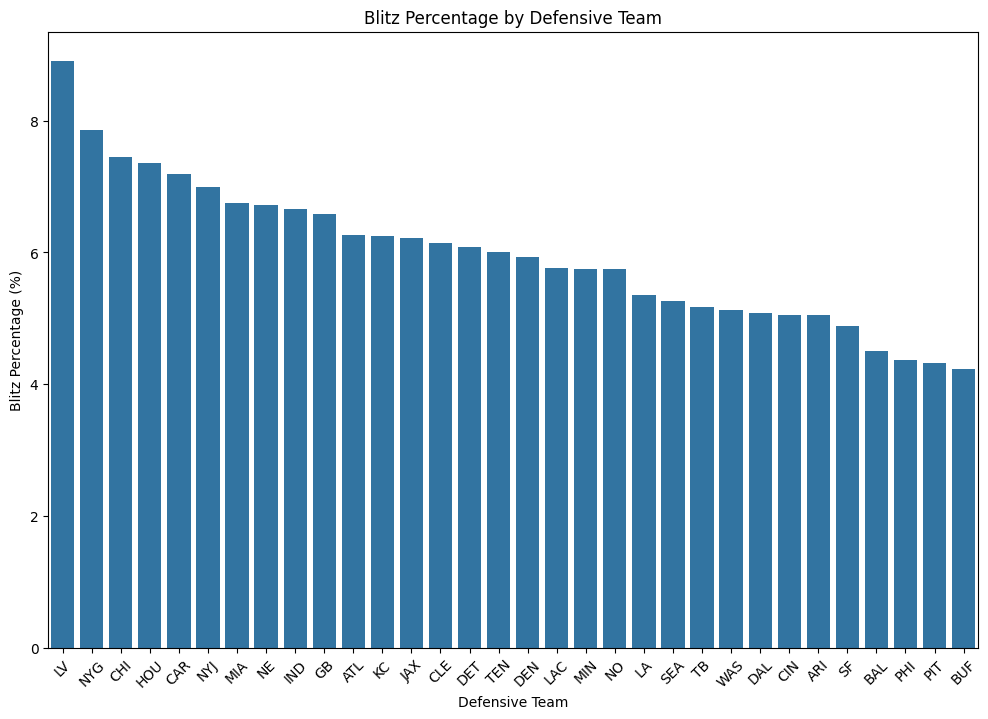

In [20]:
# Calculate blitz percentage for each defensive team
blitz_percentage = play_data.groupby('defensiveTeam')['blitz'].mean().sort_values(ascending=False) * 100

# Plot the blitz percentage
plt.figure(figsize=(12, 8))
sns.barplot(x=blitz_percentage.index, y=blitz_percentage.values)
plt.title('Blitz Percentage by Defensive Team')
plt.xlabel('Defensive Team')
plt.ylabel('Blitz Percentage (%)')
plt.xticks(rotation=45)
plt.show()

In [21]:
game_1_player_data_defensive = player_data_defensive[player_data_defensive['gameId'] == 2022090800]
game_1_tracking = defensive_tracking_data[defensive_tracking_data['gameId'] == 2022090800]
game_1 = play_data[(play_data['gameId'] == 2022090800) & (play_data['blitz'] == 1)]
game_1.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone,blitz
1248,2022090800,2688,(15:00) (Shotgun) J.Allen pass deep middle to ...,4,3,7,BUF,LA,BUF,47,...,-0.067931,0.067931,4.467861,True,NaN,NaN,0,Cover-3,Zone,1
2660,2022090800,80,"(14:29) (No Huddle, Shotgun) J.Allen scrambles...",1,2,4,BUF,LA,BUF,31,...,-0.013497,0.013497,0.823571,True,NaN,NaN,0,Cover 6-Left,Zone,1
7042,2022090800,101,(13:54) D.Singletary right end to BUF 45 for 7...,1,1,10,BUF,LA,BUF,38,...,-0.014850,0.014850,0.562363,False,OUTSIDE ZONE,LEAD,0,Cover-6 Right,Zone,1
11189,2022090800,721,"(:45) (No Huddle, Shotgun) J.Allen pass short ...",1,2,7,BUF,LA,LA,29,...,0.079390,-0.079390,-4.737277,True,NaN,NaN,0,Cover-3,Zone,1
12583,2022090800,2137,(10:34) (Shotgun) J.Allen scrambles up the mid...,3,3,7,BUF,LA,LA,43,...,-0.054069,0.054069,2.140609,True,NaN,NaN,0,Cover-1,Man,1
